In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df=pd.read_csv('/kaggle/input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv')

In [73]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [74]:
df.iloc[1,:]

id                                          4bd23055-6827-41c6-b23b-3c491f24e74d
timestamp                                                         1543284023.677
hour                                                                           2
day                                                                           27
month                                                                         11
datetime                                                     2018-11-27 02:00:23
timezone                                                        America/New_York
source                                                          Haymarket Square
destination                                                        North Station
cab_type                                                                    Lyft
product_id                                                          lyft_premier
name                                                                         Lux
price                       

In [75]:
df['coord']=df['latitude'].astype('str')+df['longitude'].astype('str')
df['coord'].unique()

array(['42.2148-71.033', '42.3503-71.081', '42.3647-71.0542',
       '42.3661-71.0631', '42.3588-71.0707', '42.3505-71.1054',
       '42.3429-71.1003', '42.3519-71.0551', '42.3519-71.0643',
       '42.3644-71.0661', '42.3559-71.055', '42.3398-71.0892'],
      dtype=object)

In [76]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [77]:
df.shape

(693071, 58)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
#since times are not important and concatinating coords source and destination are same so droppin
# all columns
df.drop(['id','timestamp','timezone','datetime','longitude','latitude','windGustTime','temperatureHighTime',
 'temperatureLowTime','apparentTemperatureHighTime','apparentTemperatureLowTime','sunriseTime',
 'sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime',
 'apparentTemperatureMaxTime','source','destination'],axis=1,inplace=True)

In [81]:
df.nunique()

hour                        24
day                         17
month                        2
cab_type                     2
product_id                  13
name                        13
price                      147
distance                   549
surge_multiplier             7
temperature                308
apparentTemperature        319
short_summary                9
long_summary                11
precipIntensity             63
precipProbability           29
humidity                    51
windSpeed                  291
windGust                   286
visibility                 227
temperatureHigh            129
temperatureLow             133
apparentTemperatureHigh    124
apparentTemperatureLow     136
icon                         7
dewPoint                   313
pressure                   316
windBearing                195
cloudCover                  83
uvIndex                      3
visibility.1               227
ozone                      274
moonPhase                   18
precipIn

In [82]:
cat=['coord','cab_type','short_summary','icon','long_summary','product_id','name','coord']

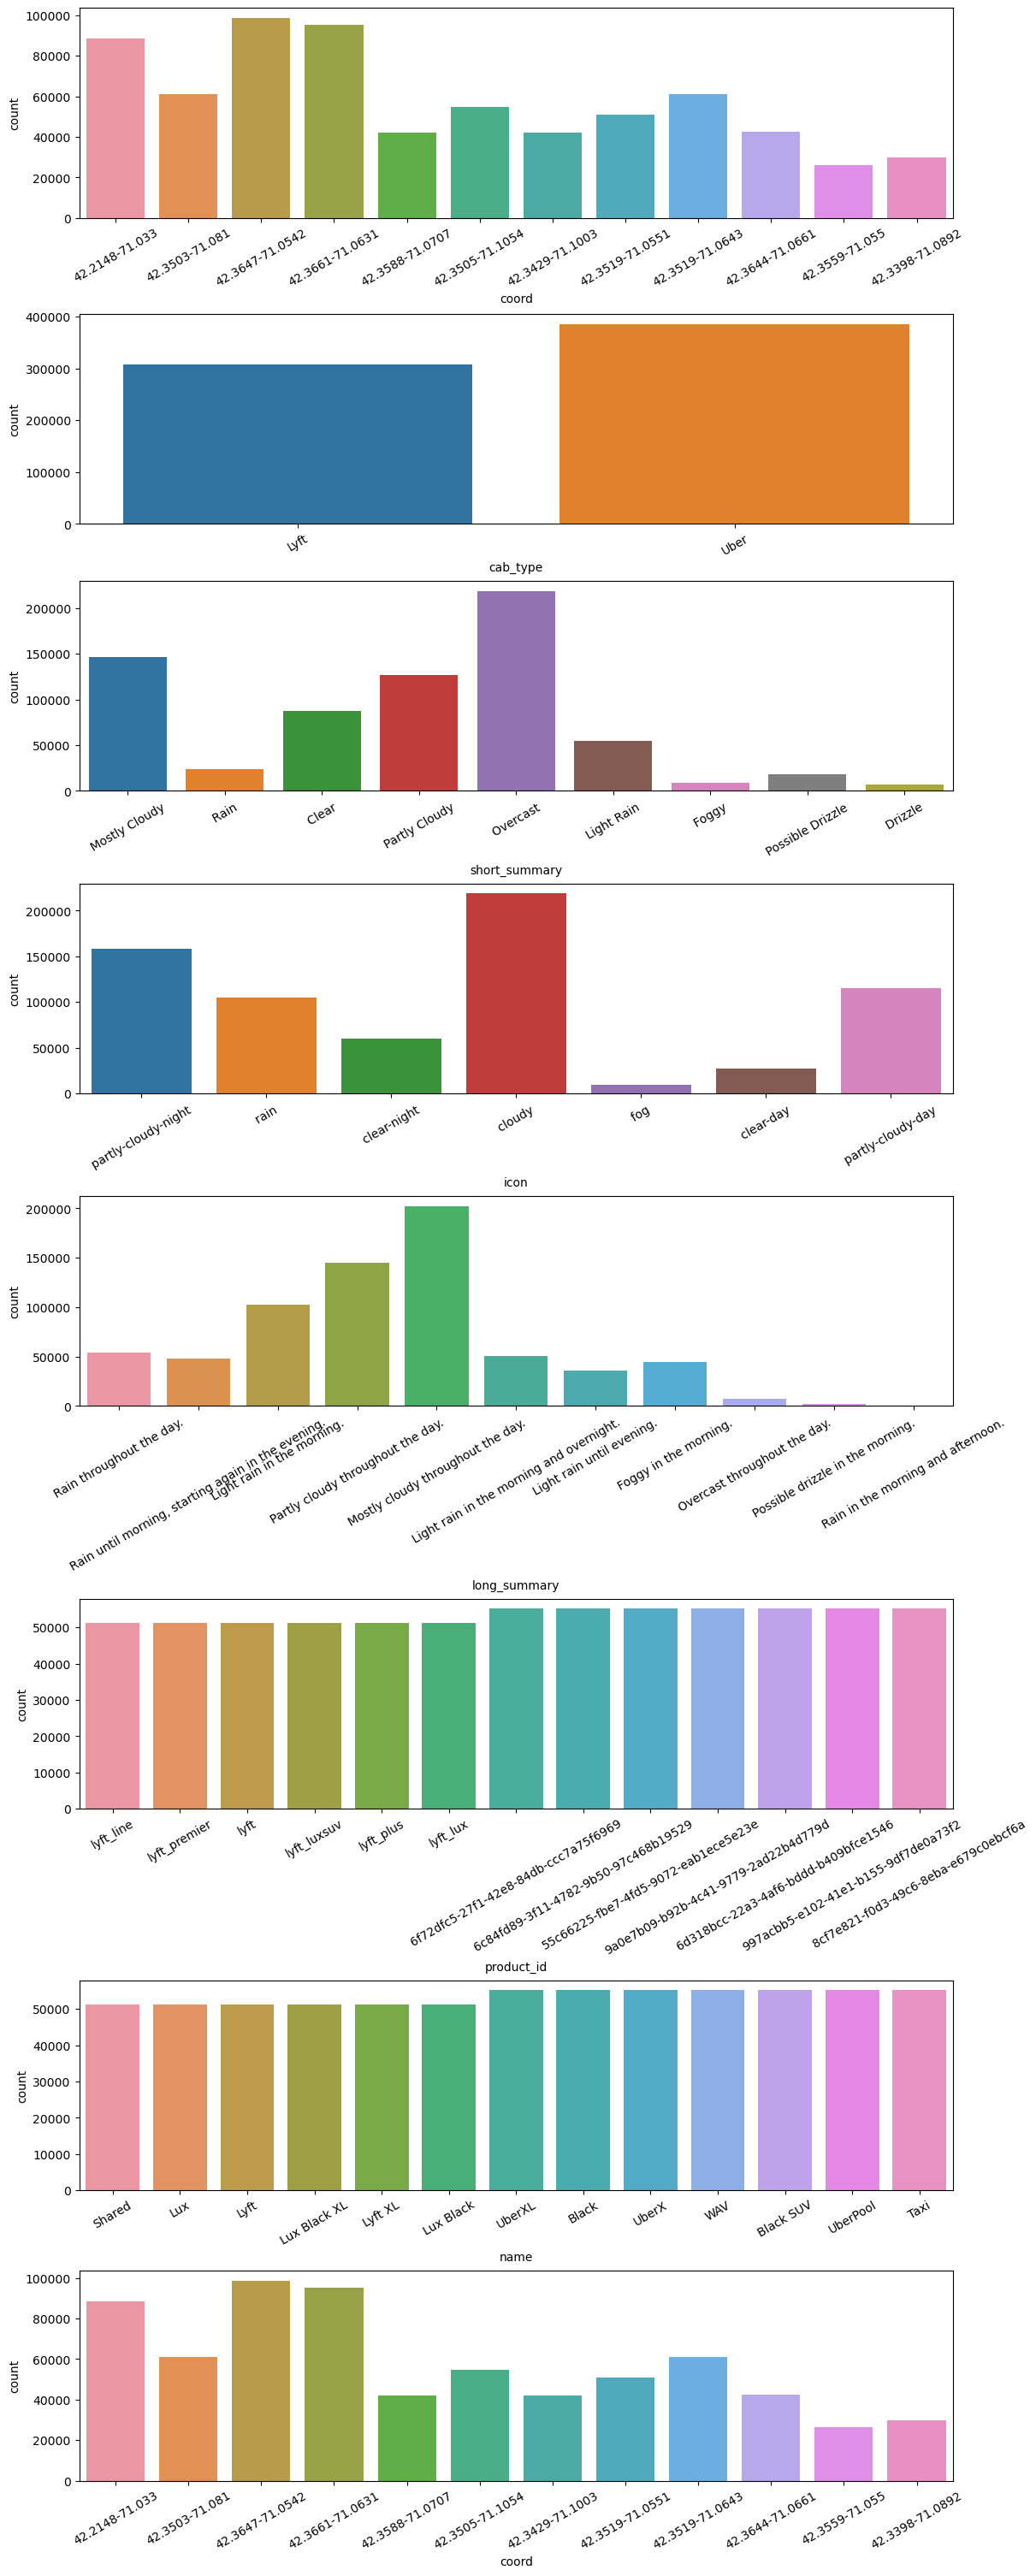

In [83]:
count=0
fig,ax=plt.subplots(len(cat),constrained_layout=True,figsize=(12,30))
for i in cat:
    sns.countplot(x=i,data=df,ax=ax[count])
    ax[count].tick_params(axis='x', rotation=30)
    count+=1

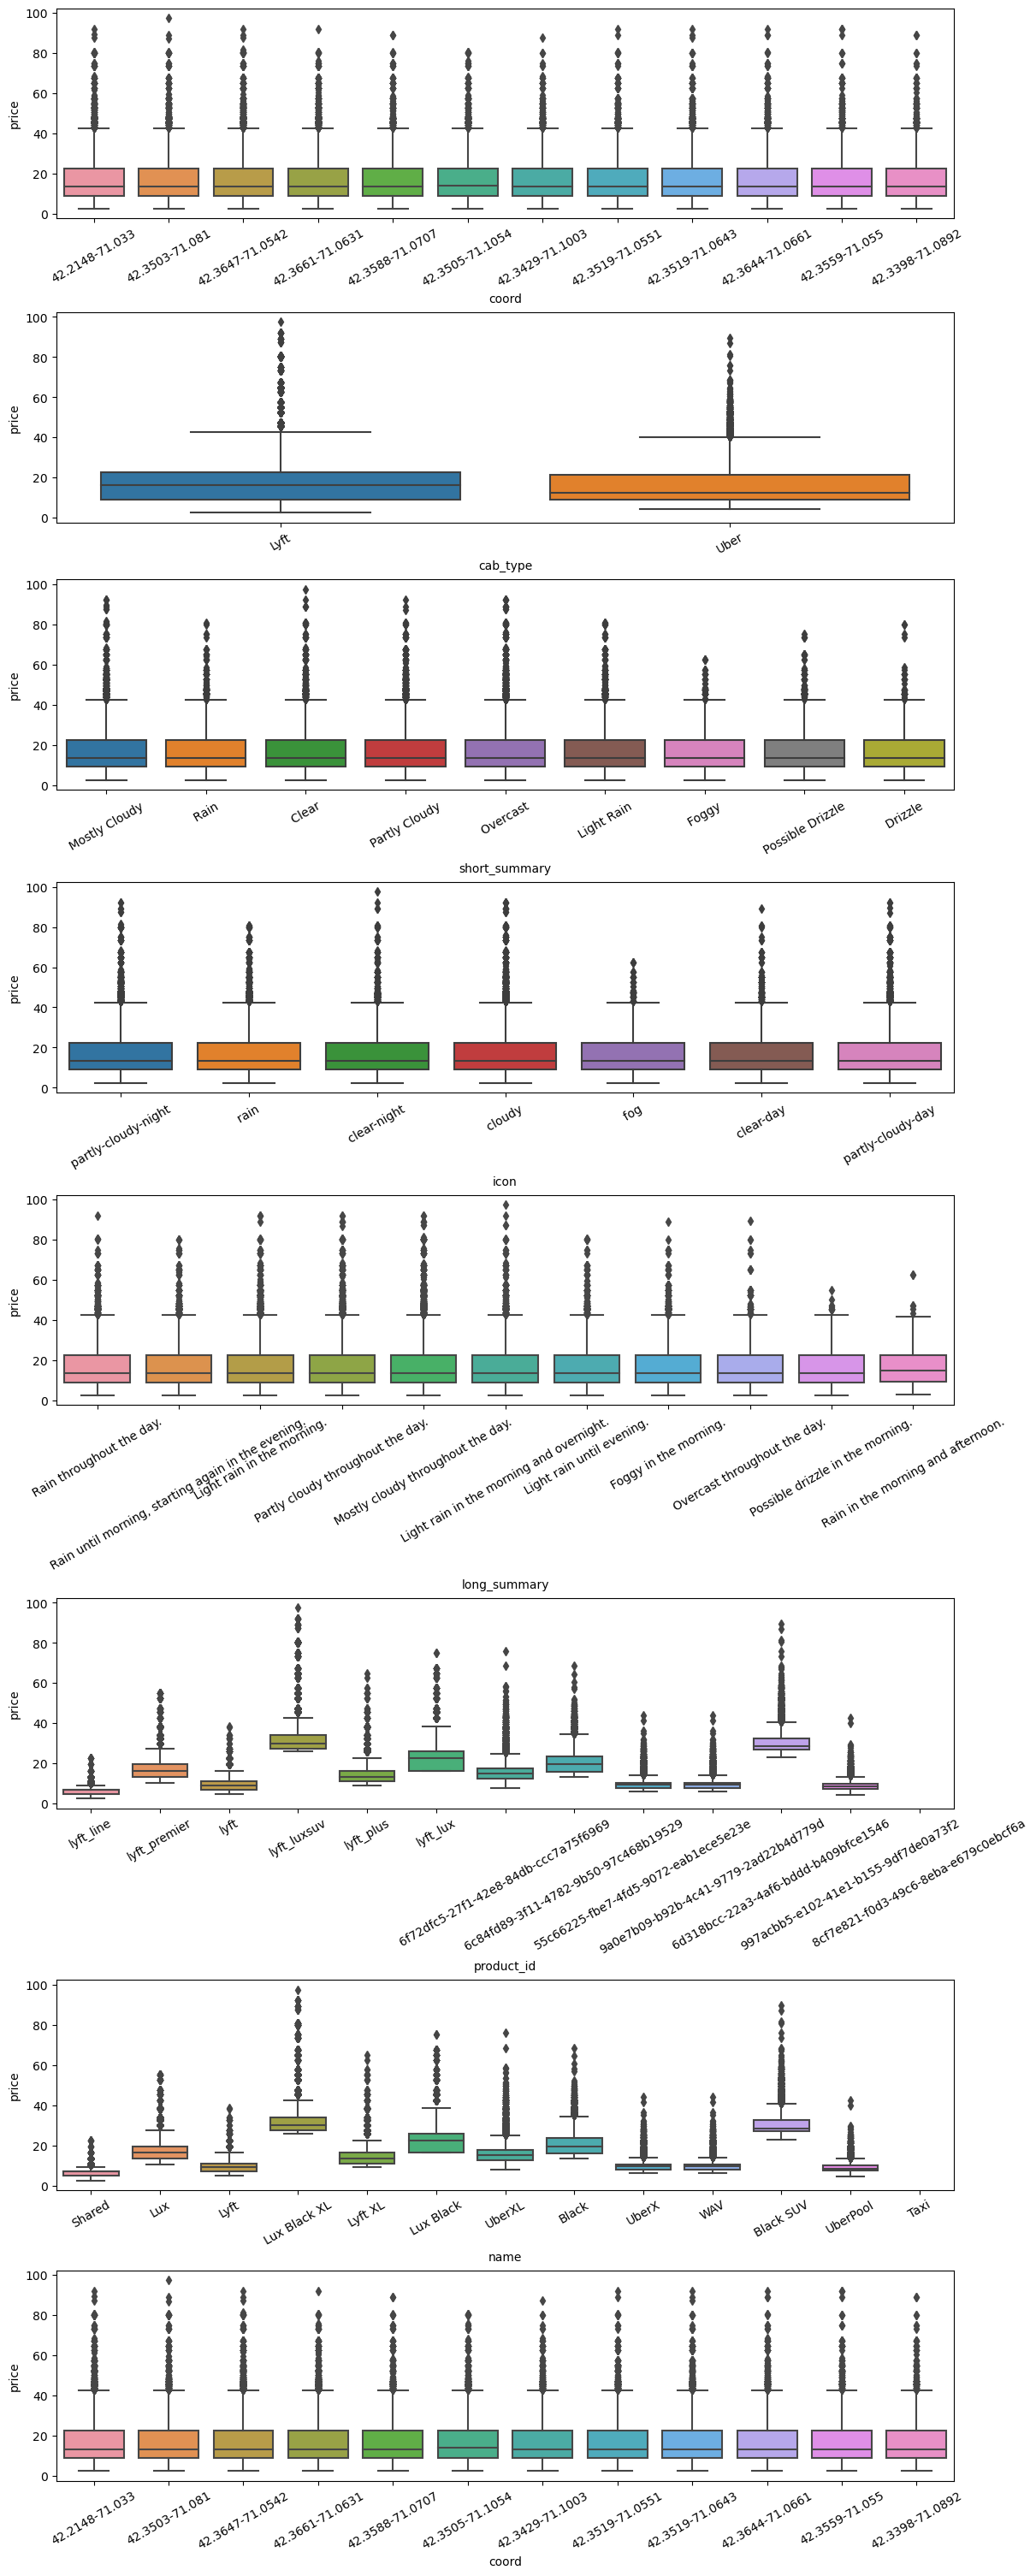

In [84]:
count=0
fig,ax=plt.subplots(len(cat),constrained_layout=True,figsize=(12,30))
for i in cat:
    sns.boxplot(x=i,data=df,y='price',ax=ax[count])
    ax[count].tick_params(axis='x', rotation=30)
    count+=1

In [86]:
df.dropna(inplace=True)
df.shape

(637976, 38)

/tmp/ipykernel_32/271047654.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

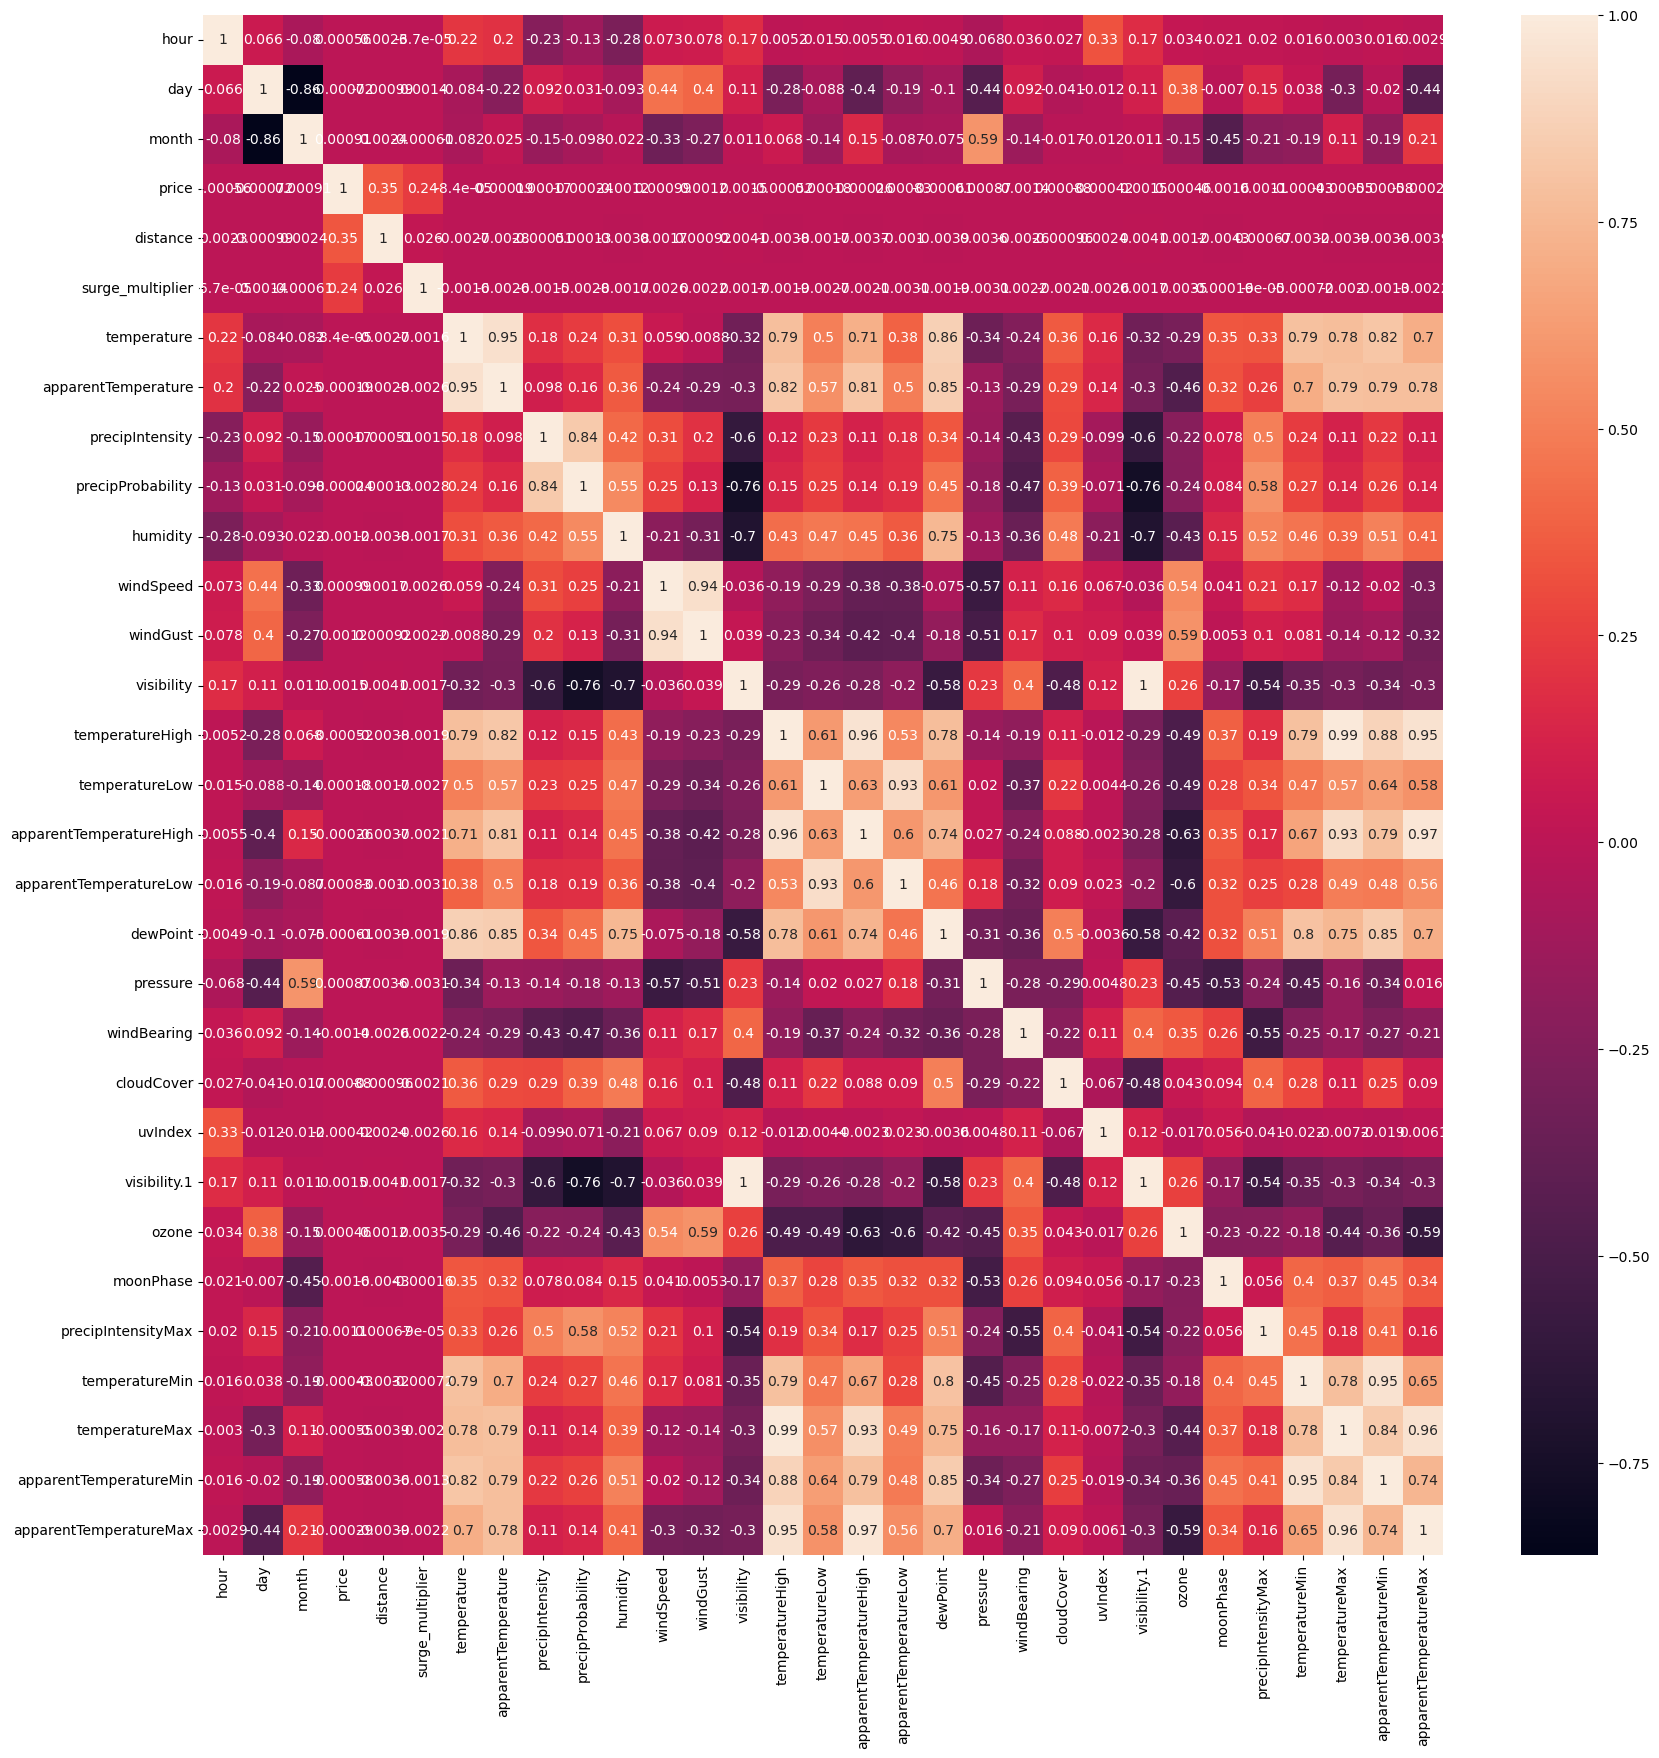

In [95]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [87]:
new_df=pd.get_dummies(df)

In [98]:
c = df.corr()

s = c.unstack()
s_neg = s.sort_values(ascending=True)
s_pos=s.sort_values(ascending=False)

print('neg\n',s_neg[:20:2])


/tmp/ipykernel_32/3628192605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


neg
 day                      month                    -0.861325
visibility               precipProbability        -0.761438
precipProbability        visibility.1             -0.761438
visibility               humidity                 -0.697860
humidity                 visibility.1             -0.697860
apparentTemperatureHigh  ozone                    -0.633244
precipIntensity          visibility.1             -0.600613
visibility.1             precipIntensity          -0.600613
ozone                    apparentTemperatureLow   -0.599911
apparentTemperatureMax   ozone                    -0.591788
dtype: float64


In [99]:
print('pos\n',s_pos[28:48:2])

pos
 temperatureMax           temperatureMax             1.000000
month                    month                      1.000000
apparentTemperatureMax   apparentTemperatureMax     1.000000
temperatureHigh          temperatureMax             0.985996
apparentTemperatureHigh  apparentTemperatureMax     0.974276
temperatureHigh          apparentTemperatureHigh    0.958722
temperatureMax           apparentTemperatureMax     0.956333
apparentTemperatureMin   temperatureMin             0.953828
apparentTemperatureMax   temperatureHigh            0.951037
temperature              apparentTemperature        0.946157
dtype: float64


In [88]:
new_df.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax', 'cab_type_Lyft',
       'cab_type_Uber', 'product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       'product_id_6c84fd89-3f11-4782-9b50-97c468b19529',
       'product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546',
       'product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       'product_id_997acbb5-e102-41e1-b155-9df7de0a73f2',
       'product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d', 'product_id_lyft',
       'product_id_lyft_line', 'product_id_lyft

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y=df['price']
new_df.drop('price',axis=1,inplace=True)
scaler=StandardScaler()
scaled=scaler.fit_transform(new_df)
xtrain,xtest,ytrain,ytest=train_test_split(scaled,y,test_size=0.2,random_state=43)

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
model=LinearRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9270430097714049

In [96]:
model.score(xtrain,ytrain)

0.9273376578844487